# Mia Scarpati #

## Machine Learning Stock Price Predictor ##

In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import yfinance as yfin

2023-03-06 16:17:56.227519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using LSTM deep learning neural networks

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL price, 1999-2022')

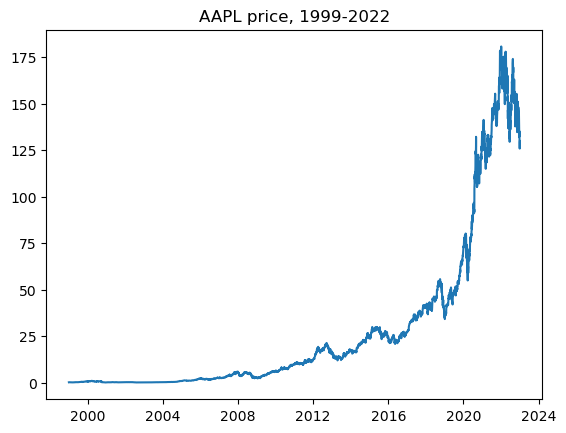

In [3]:
# Import data set
AAPL = yfin.download('AAPL', start='1999-01-01', end='2022-12-31')

# Plot data
plt.plot(AAPL.index, AAPL['Adj Close'])
plt.title("AAPL price, 1999-2022")

In [4]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
cols = ['Open','High','Low','Adj Close','Volume']
data = np.reshape(AAPL[cols], (len(AAPL[cols]), -1))
scaled_data = scaler.fit_transform(data)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:,:]

# Format data for LSTM
def create_data(data, look_back):
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])
        Y.append(data[i, 3])
    return np.array(X), np.array(Y)

inputsTrain, outputsTrain = create_data(train, 30)
inputsTest, outputsTest = create_data(test, 30)
    
inputsTrain.shape

(4801, 30, 5)

In [5]:
# Develop the model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(inputsTrain.shape[1], inputsTrain.shape[2]), recurrent_dropout=0.5),
    LSTM(units=64, return_sequences=False, recurrent_dropout=0.5),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

2023-03-06 16:18:48.102637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 51,009
Trainable params: 51,009
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train the model
model.fit(inputsTrain, outputsTrain, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
151/151 [==============================] - 9s 41ms/step - loss: 1.1875e-04
Epoch 2/10
151/151 [==============================] - 6s 41ms/step - loss: 1.2985e-05
Epoch 3/10
151/151 [==============================] - 7s 44ms/step - loss: 2.3118e-05
Epoch 4/10
151/151 [==============================] - 7s 47ms/step - loss: 1.0728e-05
Epoch 5/10
151/151 [==============================] - 6s 41ms/step - loss: 1.0204e-05
Epoch 6/10
151/151 [==============================] - 6s 43ms/step - loss: 2.1924e-05
Epoch 7/10
151/151 [==============================] - 7s 44ms/step - loss: 8.4806e-06
Epoch 8/10
151/151 [==============================] - 7s 45ms/step - loss: 8.5155e-06
Epoch 9/10
151/151 [==============================] - 7s 44ms/step - loss: 8.6254e-06
Epoch 10/10
151/151 [==============================] - 7s 45ms/step - loss: 1.0596e-05


37/37 [==============================] - 1s 7ms/step


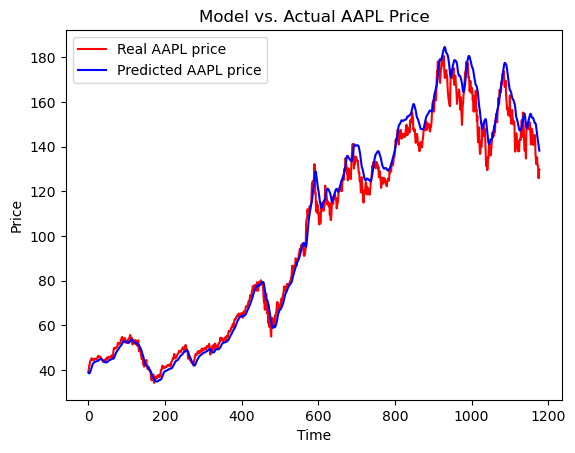

In [7]:
# Test our model
outputsPred = model.predict(inputsTest)
newScaler = MinMaxScaler(feature_range=(0,1))
adjCloseScaled = newScaler.fit_transform(data['Adj Close'].values.reshape(-1,1))
outputsPred = newScaler.inverse_transform(outputsPred)
outputsTest = newScaler.inverse_transform(outputsTest.reshape(-1,1))
plt.plot(outputsTest, color='red', label='Real AAPL price')
plt.plot(outputsPred, color='blue', label='Predicted AAPL price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Model vs. Actual AAPL Price")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'MSFT stock price, 1999-2022')

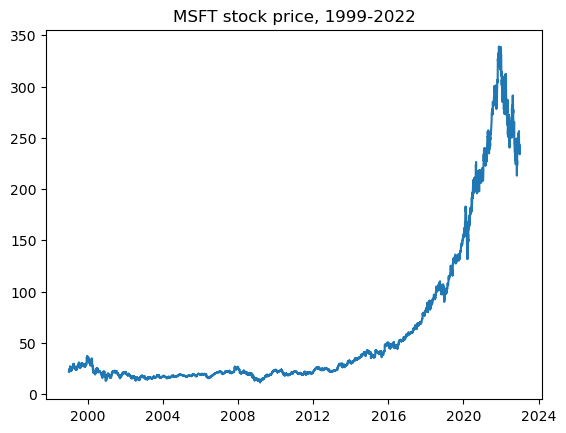

In [9]:
# Try on MSFT data
MSFT = yfin.download('MSFT', start='1999-01-01', end='2022-12-31')
plt.plot(MSFT.index, MSFT['Adj Close'])
plt.title("MSFT stock price, 1999-2022")

In [10]:
msftData = np.reshape(MSFT[cols], (len(MSFT[cols]), -1))
scaled_msft = scaler.fit_transform(msftData)

msftInTest, msftOutTest = create_data(scaled_msft, 30)
msftInTest.shape

(6009, 30, 5)

188/188 [==============================] - 1s 7ms/step


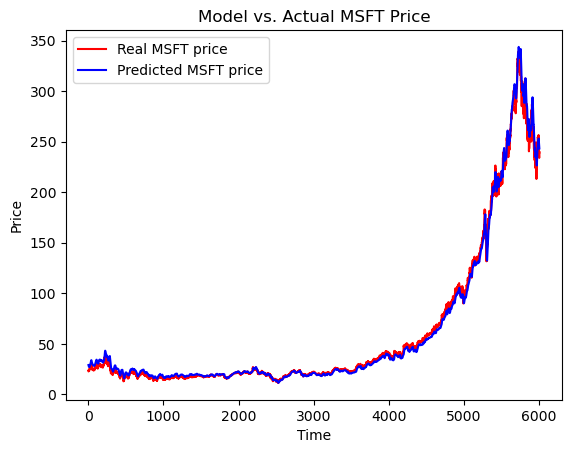

In [12]:
msftPred = model.predict(msftInTest)
adjCloseScaledMsft = newScaler.fit_transform(msftData['Adj Close'].values.reshape(-1,1))
msftPred = newScaler.inverse_transform(msftPred)
msftOutTest = newScaler.inverse_transform(msftOutTest.reshape(-1,1))
plt.plot(msftOutTest, color='red', label='Real MSFT price')
plt.plot(msftPred, color='blue', label='Predicted MSFT price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Model vs. Actual MSFT Price")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AMC stock price, 2013-2022')

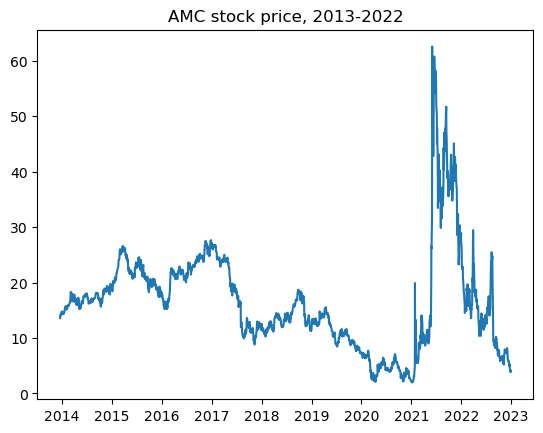

In [13]:
# Try on really volatile stock...ex. AMC
AMC = yfin.download('AMC', start='2013-12-18', end='2022-12-31')
plt.plot(AMC.index, AMC['Adj Close'])
plt.title("AMC stock price, 2013-2022")

In [14]:
amcData = np.reshape(AMC[cols], (len(AMC[cols]), -1))
scaled_amc = scaler.fit_transform(amcData)

amcInTest, amcOutTest = create_data(scaled_amc, 30)
amcInTest.shape

(2245, 30, 5)

71/71 [==============================] - 1s 7ms/step


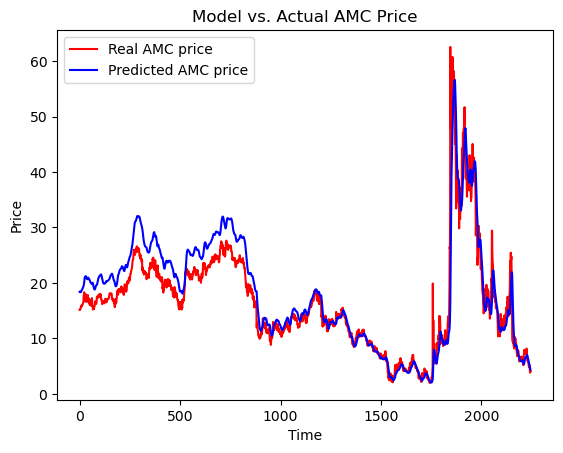

In [15]:
amcPred = model.predict(amcInTest)
adjCloseScaledAmc = newScaler.fit_transform(amcData['Adj Close'].values.reshape(-1,1))
amcPred = newScaler.inverse_transform(amcPred)
amcOutTest = newScaler.inverse_transform(amcOutTest.reshape(-1,1))
plt.plot(amcOutTest, color='red', label='Real AMC price')
plt.plot(amcPred, color='blue', label='Predicted AMC price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Model vs. Actual AMC Price")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'BBBY stock price, 1992-2022')

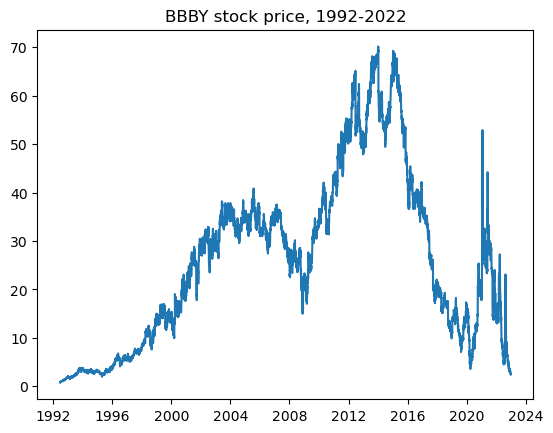

In [18]:
# Try on BBBY
BBBY = yfin.download('BBBY', start='1992-06-18', end='2022-12-31')
plt.plot(BBBY.index, BBBY['Adj Close'])
plt.title("BBBY stock price, 1992-2022")

In [19]:
bbbyData = np.reshape(BBBY[cols], (len(BBBY[cols]), -1))
scaled_bbby = scaler.fit_transform(bbbyData)

bbbyInTest, bbbyOutTest = create_data(scaled_bbby, 30)
bbbyInTest.shape

(7662, 30, 5)

240/240 [==============================] - 2s 7ms/step


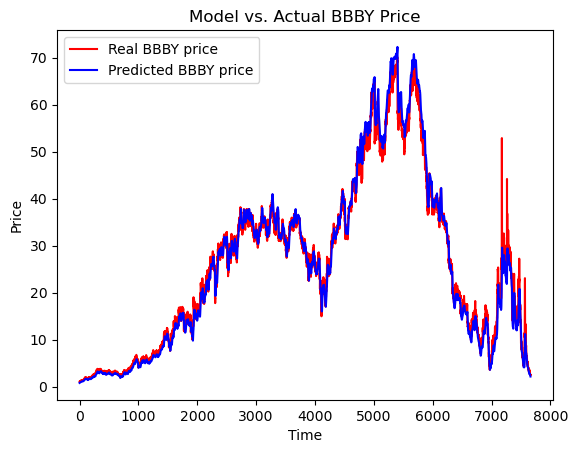

In [20]:
bbbyPred = model.predict(bbbyInTest)
adjCloseScaledBbby = newScaler.fit_transform(bbbyData['Adj Close'].values.reshape(-1,1))
bbbyPred = newScaler.inverse_transform(bbbyPred)
bbbyOutTest = newScaler.inverse_transform(bbbyOutTest.reshape(-1,1))
plt.plot(bbbyOutTest, color='red', label='Real BBBY price')
plt.plot(bbbyPred, color='blue', label='Predicted BBBY price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Model vs. Actual BBBY Price")
plt.legend()
plt.show()

In [21]:
# get MSE for each stock
aaplMSE = mean_squared_error(outputsTest, outputsPred)
msftMSE = mean_squared_error(msftOutTest, msftPred)
bbbyMSE = mean_squared_error(bbbyOutTest, bbbyPred)

print("AAPL MSE: ", aaplMSE)
print("MSFT MSE: ", msftMSE)
print("BBBY MSE: ", bbbyMSE)

AAPL MSE:  36.32479244988731
MSFT MSE:  18.571912573796588
BBBY MSE:  3.4297181855465984
